In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_excel('../data/BBDD.xlsx')

In [33]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [34]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [35]:
df = df[['sentimiento', 'review_es']].copy()

In [36]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

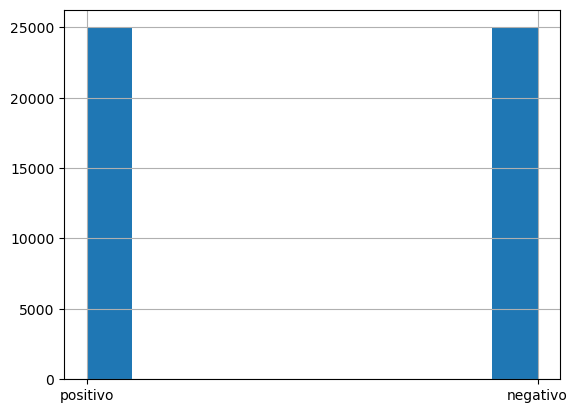

In [37]:
df['sentimiento'].hist()

In [38]:
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [39]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [40]:
df_train, df_test = train_test_split(df)

In [41]:
df_train

,sentimiento,review_es,target
43865,positivo,"Esto es lo que solía ser porno, este es un ver...",1
4714,positivo,Disfruté esta película.La forma en que estos m...,1
41953,negativo,"El compositor Robert Taylor (como Terry) es ""m...",0
33926,negativo,"Esta película fue cojo, cojo, cojo.¡Qué acumul...",0
8618,negativo,"Un ""amigo"", claramente sin sabor o clase, sugi...",0
...,...,...,...
12213,negativo,"Infamusos por ser ""traído a usted por el equip...",0
13904,positivo,Movies seem to fall into two categories: films...,1
30790,negativo,La gran guerra se rompe y papá es un piloto va...,0
46335,positivo,"Henry Thomas era ""Great"".Su personaje sostuvo ...",1


In [42]:
df_test

,sentimiento,review_es,target
3248,positivo,"Animalmente tonto anime, solo seis episodios d...",1
19043,negativo,Solo quiero decir que esta producción es muy c...,0
21160,positivo,"Bueno, para comenzar con Rajkumar Santoshi, no...",1
39812,positivo,"Cuando vi esta película, me recordó todos los ...",1
30465,negativo,"La subespecies se establece en Rumania, donde ...",0
...,...,...,...
16276,negativo,Seis por el precio de uno! Así que es un tiemp...,0
27013,positivo,Jamie Foxx absolutamente es Ray Charles.Su ren...,1
26484,negativo,"Cojo, ridículo y absurdo.Mi hijo de 6 años nos...",0
28929,positivo,¿Quién hizo esta película? ¿Me encanta esta pe...,1


In [43]:
vectorizer = TfidfVectorizer(max_features=2000)

In [44]:
X_train = vectorizer.fit_transform(df_train['review_es'])
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3466247 stored elements and shape (37500, 2000)>

In [45]:
X_test = vectorizer.transform(df_test['review_es'])
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1152960 stored elements and shape (12500, 2000)>

In [46]:
Y_train = df_train['target']
Y_test = df_test['target']

In [47]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8781066666666667
Test acc: 0.86456


In [48]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [49]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.86711495, 0.13288505],
       [0.11091568, 0.88908432]])

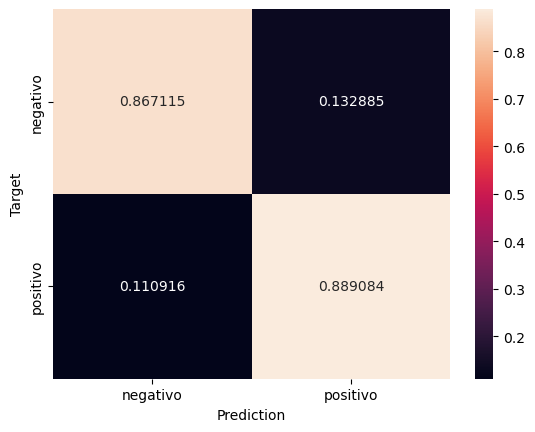

In [50]:
%run ../utils/plots.ipynb

plot(cm)

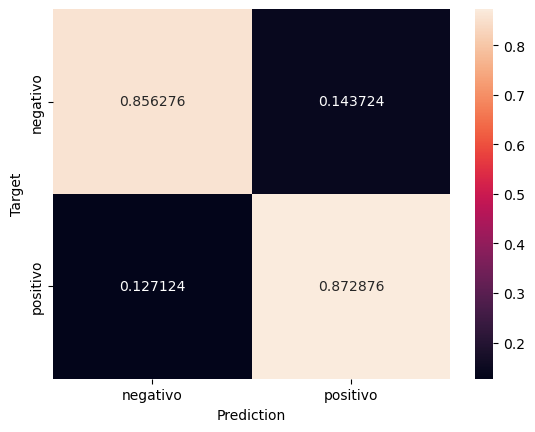

In [51]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot(cm)

In [52]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'esto': np.int64(679),
 'es': np.int64(620),
 'lo': np.int64(1068),
 'que': np.int64(1513),
 'ser': np.int64(1650),
 'porno': np.int64(1439),
 'este': np.int64(676),
 'un': np.int64(1870),
 'verdadero': np.int64(1913),
 'clásico': np.int64(317),
 'quiero': np.int64(1522),
 'decir': np.int64(450),
 'musical': np.int64(1215),
 'con': np.int64(349),
 'calificación': np.int64(241),
 'en': np.int64(582),
 'libro': np.int64(1046),
 'real': np.int64(1534),
 'hay': np.int64(859),
 'una': np.int64(1871),
 'trama': np.int64(1845),
 'para': np.int64(1338),
 'él': np.int64(1992),
 'películas': np.int64(1367),
 'de': np.int64(436),
 'pueden': np.int64(1501),
 'estos': np.int64(680),
 'días': np.int64(553),
 'lista': np.int64(1052),
 'corta': np.int64(379),
 'los': np.int64(1078),
 'clásicos': np.int64(318),
 'la': np.int64(1024),
 'película': np.int64(1366),
 'profunda': np.int64(1475),
 'detrás': np.int64(483),
 'puerta': np.int64(1504),
 'creo': np.int64(393),
 'el': np.int64(567),
 'problema': 

In [53]:
corte = 4

print('Palabras mas positivas')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras mas positivas
mejores 4.138152697522444
disfruté 4.400211994903127
genial 4.13547697364276
definitivamente 4.11491643765361
gran 4.20789752669472
hilarante 4.0512383103928675
encantó 4.647774504385401
excelente 8.237356387600139
excelentes 4.10561145543859
increíble 4.21232913275909
hoy 4.2370312826306025
maravillosa 4.204239482336383
perfecto 4.414156224683579
recomiendo 4.221620029911794


In [54]:
print('Palabras mas Negativas')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > -corte:
        print(word, weight)

Palabras mas Negativas
esto -1.983108310005816
es 1.9229533103254515
lo 1.722446079253241
que -0.014621633241638102
ser -1.361696643861237
porno -0.9822799362233494
este -1.7540704203137698
un -0.4466550963335989
verdadero 1.9847868103789728
clásico 2.6083777769710954
quiero 0.256078981809873
decir -0.6657323678941456
musical 0.5230811512263978
con 0.15789770155882896
calificación -0.0939110866286104
en -0.0062747171928113025
libro -1.8119394020051167
real 0.490881860042345
hay -0.7226655110195619
una 0.2801261547463139
trama -1.9618768524033188
para -0.9354724620605135
él 1.022185764705485
películas 0.2359482397666197
de -1.1381053627799527
pueden 0.15366876903560941
estos 0.04315206927236962
días 1.2004206280653893
lista 0.08062840441701162
corta -0.6842824167143275
los 0.10679726019615927
clásicos 1.907362429859454
la 1.0370419729245375
película -0.0399981939109042
profunda 0.3790155241761485
detrás 0.35067089646728494
puerta 0.27452955550203834
creo 2.7866122611167086
el 0.07842276

(array([  1.,   0.,   1.,   1.,   1.,   1.,   2.,   3.,   3.,   3.,  12.,
         26.,  25.,  63., 148., 337., 504., 445., 250.,  96.,  31.,  25.,
          7.,  13.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-10.33753875,  -9.71837558,  -9.09921241,  -8.48004924,
         -7.86088607,  -7.2417229 ,  -6.62255973,  -6.00339655,
         -5.38423338,  -4.76507021,  -4.14590704,  -3.52674387,
         -2.9075807 ,  -2.28841753,  -1.66925435,  -1.05009118,
         -0.43092801,   0.18823516,   0.80739833,   1.4265615 ,
          2.04572467,   2.66488785,   3.28405102,   3.90321419,
          4.52237736,   5.14154053,   5.7607037 ,   6.37986687,
          6.99903004,   7.61819322,   8.23735639]),
 <BarContainer object of 30 artists>)

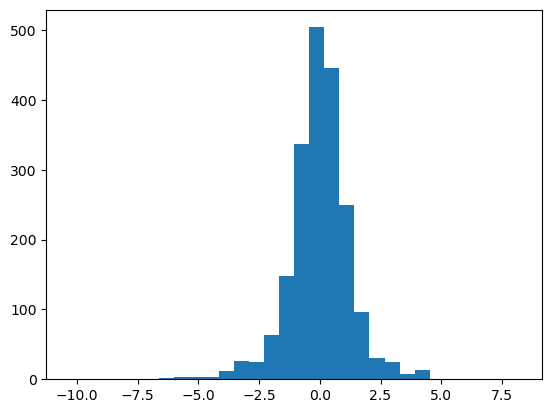

In [55]:
plt.hist(model.coef_[0], bins=30)

In [56]:
prueba = ['estuvo muy entretenida la pelicula', 'estuvo terrible la pelicula, me aburrio mucho', 'no la recomiendo']

x = vectorizer.transform(prueba)

In [57]:
P = model.predict(x)

In [58]:
clases = model.classes_

In [59]:
for i in range(len(prueba)):
    if clases[P_train[i]] == 0:
        print(f'El comentario: "{prueba[i]}" es: Negativo')
    else:
        print(f'El comentario: "{prueba[i]}" es: Positivo')

El comentario: "estuvo muy entretenida la pelicula" es: Positivo
El comentario: "estuvo terrible la pelicula, me aburrio mucho" es: Positivo
El comentario: "no la recomiendo" es: Negativo
